In [94]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"  # "Times New Roman"      #全体のフォントを設定
plt.rcParams["xtick.direction"] = "in"  # x軸の目盛線を内向きへ
plt.rcParams["ytick.direction"] = "in"  # y軸の目盛線を内向きへ
plt.rcParams["xtick.minor.visible"] = True  # x軸補助目盛りの追加
plt.rcParams["ytick.minor.visible"] = True  # y軸補助目盛りの追加
# plt.rcParams["xtick.major.width"] = 1.5              #x軸主目盛り線の線幅
# plt.rcParams["ytick.major.width"] = 1.5              #y軸主目盛り線の線幅
# plt.rcParams["xtick.minor.width"] = 1.0              #x軸補助目盛り線の線幅
# plt.rcParams["ytick.minor.width"] = 1.0              #y軸補助目盛り線の線幅
plt.rcParams["xtick.major.size"] = 10  # x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 10  # y軸主目盛り線の長さ
plt.rcParams["xtick.minor.size"] = 5  # x軸補助目盛り線の長さ
plt.rcParams["ytick.minor.size"] = 5  # y軸補助目盛り線の長さ
plt.rcParams["font.size"] = 14  # フォントの大きさ
plt.rcParams["axes.linewidth"] = 1  # 囲みの太さ
plt.rcParams["figure.figsize"] = [2.5, 2]
# 目盛方向を両側, 目盛の長さを5ポイント, 目盛と目盛ラベルの色
# ax.tick_params(direction="in", length=10, colors="black", width=1)
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.right"] = True


In [97]:

def plot(x, y, label, xlabel, ylabel, title, MIN_X, MAX_X, X_STEP, MIN_Y, MAX_Y, Y_STEP, savepath, SUB_X_STEP=0, SUB_Y_STEP=0, hlines=True, figsize=(2.5 * 1.5, 2 * 1.5)):
    """
    """
    # if SUB_X_STEP == 0:
    #     SUB_X_STEP = X_STEP / 2
    # if SUB_Y_STEP == 0:
    #     SUB_Y_STEP = Y_STEP / 2

    # Figureを設定
    fig = plt.figure(figsize=figsize)
    # Axesを追加
    ax = fig.add_subplot(111)
    ax.plot(x, y, label, color="red", marker="o", markersize=3, linewidth=1, markerfacecolor="red", markeredgewidth=2, markeredgecolor="red", markerfacecoloralt="red")  # , x="x", y="fwhm")
    if hlines:
        ax.hlines(0, 0, MAX_Y, color='black', linestyles='dotted')
    else:
        pass

    # plt.show()
    # Axesのタイトルの設定
    ax.set_title(title)
    # 軸ラベルの設定
    ax.set_xlabel(xlabel, weight="light")
    ax.set_ylabel(ylabel, weight="light")
    # x軸の目盛設定
    ax.set_xlim(MIN_X, MAX_X)
    ax.set_xticks(np.arange(MIN_X, MAX_X, step=X_STEP))
    # y軸の目盛設定
    ax.set_ylim(MIN_Y, MAX_Y)
    ax.set_yticks(np.arange(MIN_Y, MAX_Y, step=Y_STEP))
    # 副目盛りの設定
    ax.minorticks_on()
    ax.tick_params(which="minor", direction="in", length=5, colors="black")
    ax.set_xticks(np.arange(MIN_X, MAX_X, step=SUB_X_STEP), minor=True)
    ax.set_yticks(np.arange(0, MAX_Y, step=SUB_Y_STEP), minor=True)
    plt.savefig(savepath, dpi=300, bbox_inches='tight')


In [86]:
def length_1ql(r, t):
    # return 4*np.sqrt(r**2 + 2*r*t + (t**2)/3) + np.sqrt(10/3)*t
    print(np.sqrt(r**2 + 2 * r * t + (t**2) / 3)) # 四面体の高さ
    print(np.sqrt((12 * r * t**3 + 12 * t * r**3 + 27 * r**2 * t**2 - t**4 - r**4) / (3 * t**2 + 3 * r**2 - 6 * r * t))) # 八面体の高さ（多分嘘）
    # print(np.sqrt) # 八面体の高さ（多分嘘その2）
    print(np.sqrt(4 / 3) * t)
    return 4 * 2 * np.sqrt(r**2 + 2 * r * t + (t**2) / 3) + np.sqrt(4 / 3) * t
    # return 2 * np.sqrt(r**2 + 2 * r * t + (t**2) / 3) + \
    #         2 * np.sqrt((12*r*t**3 + 12*t*r**3 + 27*r**2 * t**2 - t**4 - r**4)/(3*t**2 + 3*r**2 -6*r*t)) + \
    #         np.sqrt(10 / 3) * t


In [87]:
B = 0.156
S = 0.140
C = 0.128
# B = 0.207
# S = 0.206
# C = 0.130  # https://www.chem.nara-wu.ac.jp/~tanase/echem/PeriodicTable/Element1/Cr.html
def estimate_r(x, y):
    # BとSの比がy:1-yの時
    # CとB+Sの比がx:2-xの時
    # C = (C*x + (B*y + S*(1-y))*(2-x)) / 2
    print((B * y + S * (1 - y)))
    return (C*x + (B*y + S*(1-y))*(2-x)) / 2


x = np.array([0.0, 0.008, 0.02, 0.05, 0.08])
y = np.array([0.84, 0.84, 0.84, 0.84, 0.84])
r = estimate_r(x, y)
print(r)

[0.15344 0.15344 0.15344 0.15344 0.15344]
[0.15344    0.15333824 0.1531856  0.152804   0.1524224 ]


In [88]:
t = 0.140
len_1ql = length_1ql(r, t)
print(len_1ql)

[0.27025981 0.27014932 0.26998357 0.26956913 0.26915459]
[6.46401513 6.50894651 6.57764488 6.75656203 6.94647906]
0.16165807537309523
[2.32373659 2.32285265 2.32152665 2.31821111 2.3148948 ]


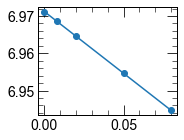

In [89]:
plt.plot(x, 3*len_1ql, marker='o', label='1QL')

[0.20684 0.20684 0.20678 0.20684 0.20684]
[0.20684    0.20653264 0.2060122  0.204919   0.2037664 ]
[0.37702281 0.37668623 0.37611619 0.37491833 0.3736547 ]
0.23786831090612578
[3.25405079 3.25135811 3.24679781 3.23721499 3.22710592]


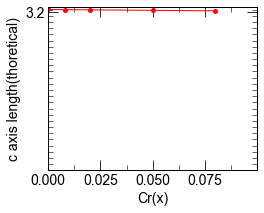

In [104]:
B = 0.207
S = 0.206
C = 0.130
T = 0.206


def length_1ql(r, t):
    # return 4*np.sqrt(r**2 + 2*r*t + (t**2)/3) + np.sqrt(10/3)*t
    print(np.sqrt(r**2 + 2 * r * t + (t**2) / 3))  # 四面体の高さ
    # print(np.sqrt((12 * r * t**3 + 12 * t * r**3 + 27 * r**2 * t**2 - t**4 - r**4) / (3 * t**2 + 3 * r**2 - 6 * r * t)))  # 八面体の高さ（多分嘘）
    # print(np.sqrt) # 八面体の高さ（多分嘘その2）
    print(np.sqrt(4 / 3) * t)
    return 4 * 2 * np.sqrt(r**2 + 2 * r * t + (t**2) / 3) + np.sqrt(4 / 3) * t
    # return 2 * np.sqrt(r**2 + 2 * r * t + (t**2) / 3) + \
    #         2 * np.sqrt((12*r*t**3 + 12*t*r**3 + 27*r**2 * t**2 - t**4 - r**4)/(3*t**2 + 3*r**2 -6*r*t)) + \
    #         np.sqrt(10 / 3) * t

def estimate_r(x, y):
    # BとSの比がy:1-yの時
    # CとB+Sの比がx:2-xの時
    # C = (C*x + (B*y + S*(1-y))*(2-x)) / 2
    # print((B * y + S * (1 - y)))
    return (C * x + (B * y + S * (1 - y)) * (2 - x)) / 2


# x = np.array([0.0, 0.008, 0.02, 0.05, 0.08])
# y = np.array([0.84, 0.84, 0.84, 0.84, 0.84])
# r = estimate_r(x, y)
# print(r)
x = np.array([0.0, 0.008, 0.02, 0.05, 0.08])
y = np.array([0.84, 0.84, 0.78, 0.84, 0.84])
print((B * y + S * (1 - y)))
r = estimate_r(x, y)
print(r)

len_1ql = length_1ql(r, T)
print(len_1ql)
# plt.plot(x, len_1ql, marker='o', label='1QL')
plot(x, len_1ql, label='', xlabel="Cr(x)", ylabel="c axis length(thoretical)", title="", MIN_X=0, MAX_X=0.1, X_STEP=0.025, SUB_X_STEP=0.0125, MIN_Y=3.2, MAX_Y=3.3001, Y_STEP=0.25, SUB_Y_STEP=0.125, savepath="/Users/uedataiga/Desktop/卒業研究/前期/Data/解析/中間報告/estimate_c_axis_length.png", hlines=False)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Locator attempting to generate 2001 ticks ([1.1546319456101628e-14, ..., 9.999999999999797]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2001 ticks ([1.1546319456101628e-14, ..., 9.999999999999797]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2001 ticks ([1.1546319456101628e-14, ..., 9.999999999999797]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2001 ticks ([1.1546319456101628e-14, ..., 9.999999999999797]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2001 ticks ([1.1546319456101628e-14, ..., 9.999999999999797]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2001 ticks ([1.1546319456101628e-14, ..., 9.999999999999797]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2001 ticks ([1.1546319456101628e-14, ..., 9.999999999999797]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2001 ticks ([1.1546319456101628e-14, .

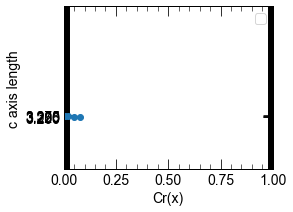

In [103]:
fig = plt.figure(figsize=(2.5*1.5, 2*1.5))
ax = fig.add_subplot(111)
ax.plot(x, len_1ql,  marker="o")
ax.set_xlabel("Cr(x)")
ax.set_ylabel("c axis length")
ax.set_ylim(0, 10)
ax.set_xlim(0, 1)
ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
# ax.set_xticklabels(["0", "0.5", "1"])
ax.set_yticks([3.2, 3.225, 3.25, 3.275, 3.3])
# ax.set_yticklabels(["0", "5", "10"])
ax.legend()
plt.show()



In [105]:
x

array([0.   , 0.008, 0.02 , 0.05 , 0.08 ])

In [107]:
len_1ql

array([3.25405079, 3.25135811, 3.24679781, 3.23721499, 3.22710592])